In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Preparation

In [2]:
df = pd.read_excel("World_Manufacture_Data.xlsx")
df.head()

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,Activity,Observation Status,Reporting Type,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,9,9.2,9.2.1,NV_IND_MANFPC,Manufacturing value added per capita (constant...,4,Afghanistan,ISIC4_C,A,G,...,26.53,23.98,21.78,25.26,29.11,41.93,37.70,32.86,28.84,27.09
1,9,9.2,9.2.1,NV_IND_MANFPC,Manufacturing value added per capita (constant...,2,Africa,ISIC4_C,A,G,...,216.94,215.85,214.88,213.81,215.42,215.30,202.85,206.33,209.10,209.33
2,9,9.2,9.2.1,NV_IND_MANFPC,Manufacturing value added per capita (constant...,8,Albania,ISIC4_C,A,G,...,213.34,224.05,234.34,263.62,280.35,296.37,284.88,317.96,341.97,359.47
3,9,9.2,9.2.1,NV_IND_MANFPC,Manufacturing value added per capita (constant...,12,Algeria,ISIC4_C,A,G,...,181.00,185.50,188.40,192.87,195.95,200.02,188.82,194.70,194.51,197.49
4,9,9.2,9.2.1,NV_IND_MANFPC,Manufacturing value added per capita (constant...,19,Americas,ISIC4_C,A,G,...,3163.34,3153.43,3098.38,3043.40,3120.21,3092.24,2907.44,3067.15,3105.65,3126.77


In [3]:
df = df[df['GeoAreaName']=='World']
df

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,Activity,Observation Status,Reporting Type,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
240,9,9.2,9.2.1,NV_IND_MANFPC,Manufacturing value added per capita (constant...,1,World,ISIC4_C,A,G,...,1612.78,1653.07,1678.74,1717.11,1767.33,1775.73,1722.15,1853.22,1887.45,1922.61


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 240 to 240
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Goal                1 non-null      int64  
 1   Target              1 non-null      float64
 2   Indicator           1 non-null      object 
 3   SeriesCode          1 non-null      object 
 4   SeriesDescription   1 non-null      object 
 5   GeoAreaCode         1 non-null      int64  
 6   GeoAreaName         1 non-null      object 
 7   Activity            1 non-null      object 
 8   Observation Status  1 non-null      object 
 9   Reporting Type      1 non-null      object 
 10  Units               1 non-null      object 
 11  2000                1 non-null      float64
 12  2001                1 non-null      float64
 13  2002                1 non-null      float64
 14  2003                1 non-null      float64
 15  2004                1 non-null      float64
 16  2005    

In [5]:
columns_to_drop = ['Goal', 'Target', 'Indicator', 'SeriesCode', 'SeriesDescription', 'GeoAreaCode', 
                   'Activity', 'Observation Status', 'Reporting Type', 'Units']

df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

In [6]:
df

,GeoAreaName,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
240,World,1154.77,1140.62,1154.87,1210.19,1289.63,1329.39,1401.24,1467.73,1468.28,...,1612.78,1653.07,1678.74,1717.11,1767.33,1775.73,1722.15,1853.22,1887.45,1922.61


In [7]:
df.set_index('GeoAreaName', inplace=True)  # Set 'GeoAreaName' as index
df = df.T  # Transpose the DataFrame
df.reset_index(inplace=True)  # Reset the index to turn the index into a column
df.columns = ['Year', 'Manufacture World']  # Rename the columns
df.set_index('Year', inplace=True)  # Set 'Year' as the index

df

,Manufacture World
Year,
2000,1154.77
2001,1140.62
2002,1154.87
2003,1210.19
2004,1289.63
2005,1329.39
2006,1401.24
2007,1467.73
2008,1468.28


<AxesSubplot:xlabel='Year'>

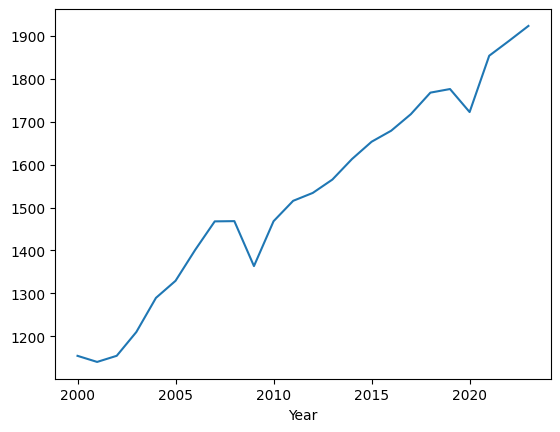

In [8]:
df['Manufacture World'].plot()

<AxesSubplot:xlabel='Year'>

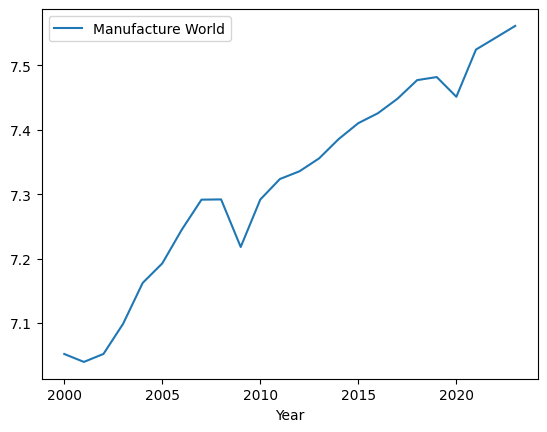

In [9]:
df = np.log(df)
df.plot()

In [10]:
df.head()

,Manufacture World
Year,
2000,7.051656
2001,7.039327
2002,7.051743
2003,7.098533
2004,7.162111


In [11]:
df.reset_index(inplace=True)
msk = (df.index < len(df)-2)
df_train = df[msk].copy()
df_test = df[~msk].copy()

print(f'train length: {len(df_train)} & test length: {len(df_test)}')

train length: 22 & test length: 2


# Check ACF & PACF

In [12]:
df_train

,Year,Manufacture World
0,2000,7.051656
1,2001,7.039327
2,2002,7.051743
3,2003,7.098533
4,2004,7.162111
5,2005,7.192475
6,2006,7.245113
7,2007,7.291472
8,2008,7.291847
9,2009,7.217928


In [23]:
n_points = len(df_train)
max_lags = min(n_points // 2, 10)

C:\Users\GF63\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


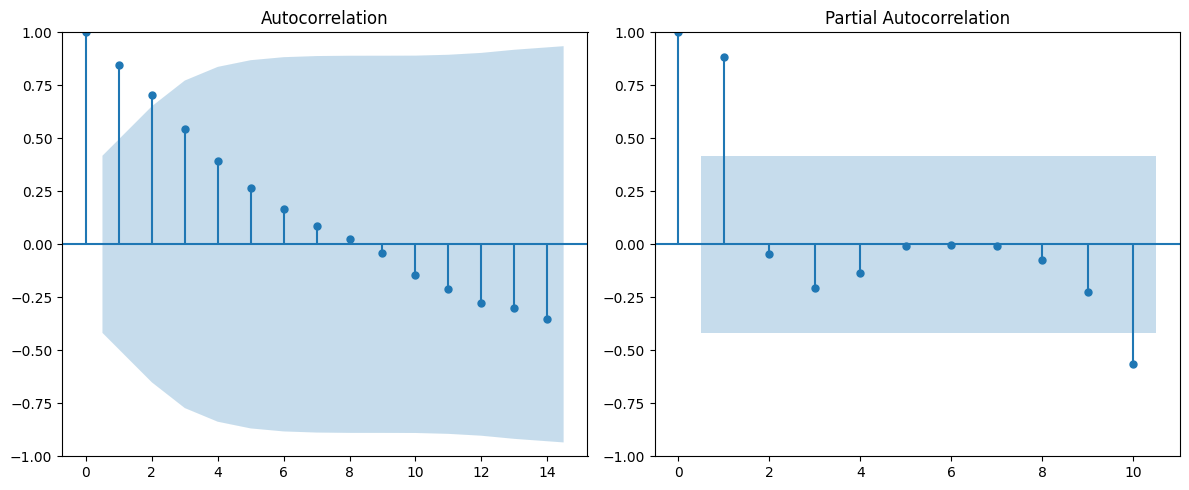

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

plot_acf(df_train['Manufacture World'], ax=ax[0])
plot_pacf(df_train['Manufacture World'], ax=ax[1], lags=max_lags)

plt.tight_layout()
plt.show()

In [25]:
adf_test = adfuller(df_train['Manufacture World'])
print(f'p-value: {adf_test[1]}')

p-value: 0.45749445177424153


# Make Stationary

In [26]:
df_train_diff = df_train['Manufacture World'].diff().dropna()
df_train_diff

1    -0.012329
2     0.012416
3     0.046790
4     0.063578
5     0.030365
6     0.052637
7     0.046359
8     0.000375
9    -0.073919
10    0.073797
11    0.031823
12    0.012048
13    0.020059
14    0.030061
15    0.024675
16    0.015409
17    0.022599
18    0.028827
19    0.004742
20   -0.030638
21    0.073351
Name: Manufacture World, dtype: float64

<AxesSubplot:>

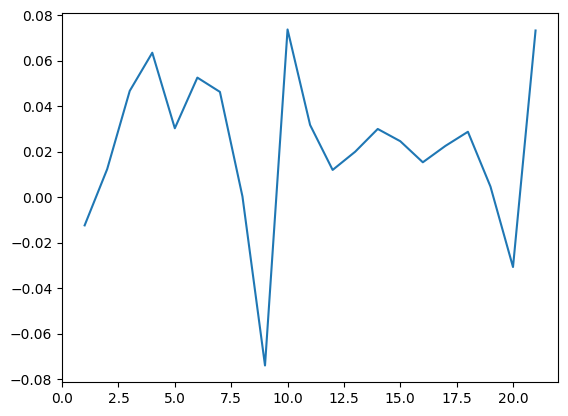

In [27]:
df_train_diff.plot()

In [31]:
n_points = len(df_train)
max_lags = min(n_points // 2, 9)

C:\Users\GF63\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


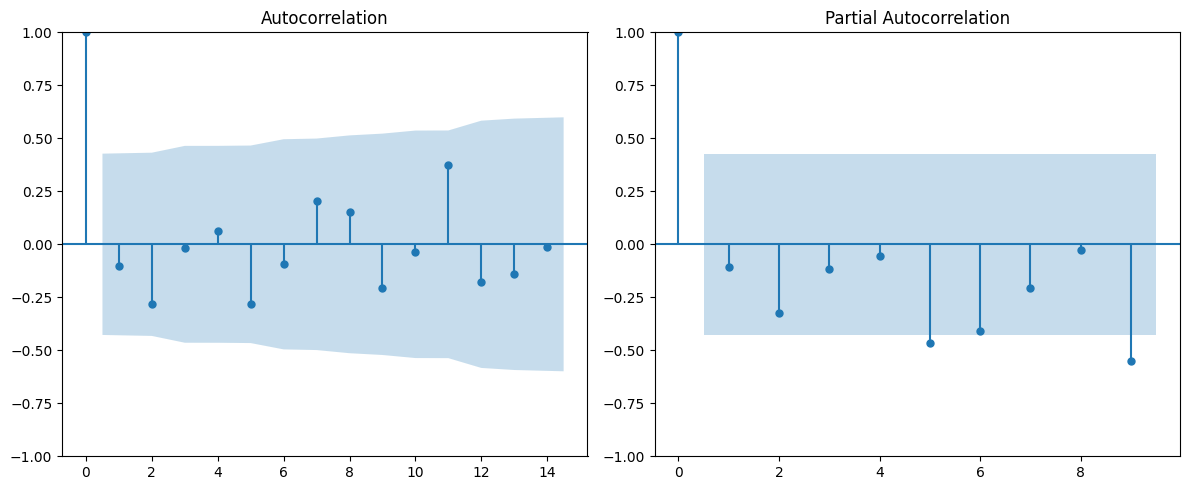

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

plot_acf(df_train_diff, ax=ax[0])
plot_pacf(df_train_diff, ax=ax[1], lags=max_lags)

plt.tight_layout()
plt.show()

In [33]:
adf_test_diff = adfuller(df_train_diff)
print(f'p-value: {adf_test_diff[1]}')

p-value: 0.0006286701221761443


# Model Fit

## ARIMA Model

In [36]:
model = ARIMA(df_train['Manufacture World'], order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:      Manufacture World   No. Observations:                   22
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  38.302
Date:                Thu, 26 Sep 2024   AIC                            -68.605
Time:                        14:54:39   BIC                            -64.241
Sample:                             0   HQIC                           -67.577
                                 - 22                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2996      0.198     36.820      0.000       6.911       7.688
ar.L1          0.9732      0.087     11.231      0.000       0.803       1.143
ma.L1          0.2516      0.300      0.838      0.4

# Visualize Residu

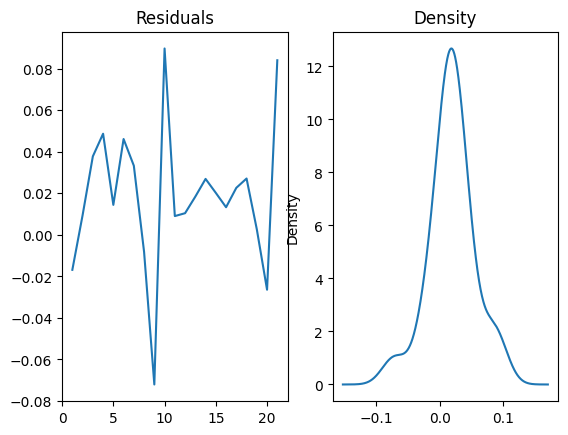

In [37]:
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

C:\Users\GF63\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


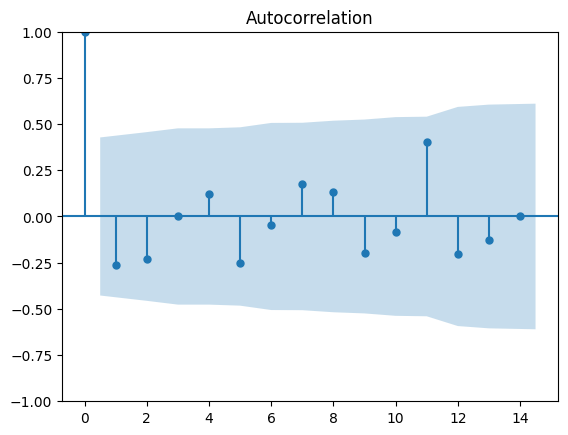

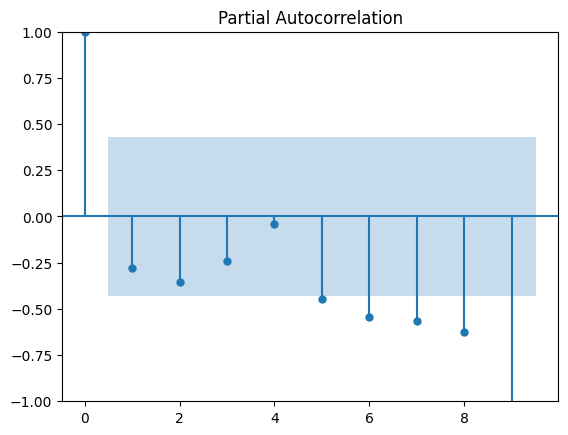

In [38]:
acf_res = plot_acf(residuals)
pacf_res = plot_pacf(residuals, lags=max_lags)

# Visualize Result

<AxesSubplot:>

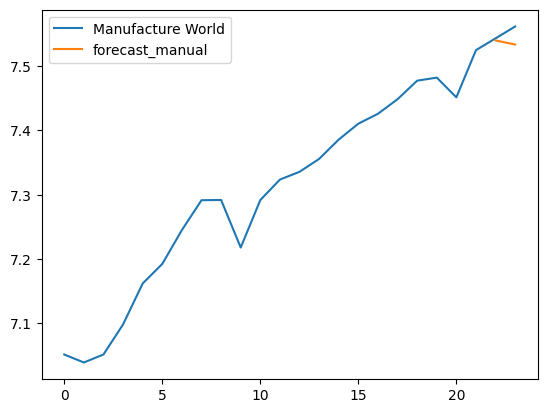

In [39]:
forecast_test = model_fit.forecast(len(df_test))
df['forecast_manual'] = [None]*len(df_train) + list(forecast_test)

df.plot()

# Forecast Result

In [40]:
forecast_years = 6
forecast_new = model_fit.forecast(steps=forecast_years).values

forecast_new

array([7.539801  , 7.53336621, 7.52710377, 7.52100906, 7.51507759,
       7.50930499])

In [41]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)

In [42]:
future_index = pd.date_range(start=df.index[-1] + pd.DateOffset(1), periods=forecast_years, freq='Y')
forecast_df = pd.DataFrame(data = forecast_new, index=future_index, columns=['Unemployment World Forecast'])

forecast_df

,Unemployment World Forecast
2023-12-31,7.539801
2024-12-31,7.533366
2025-12-31,7.527104
2026-12-31,7.521009
2027-12-31,7.515078
2028-12-31,7.509305


In [43]:
df_with_forecast = pd.concat([df, forecast_df])

df_with_forecast

,Manufacture World,forecast_manual,Unemployment World Forecast
2000-01-01,7.051656,NaN,NaN
2001-01-01,7.039327,NaN,NaN
2002-01-01,7.051743,NaN,NaN
2003-01-01,7.098533,NaN,NaN
2004-01-01,7.162111,NaN,NaN
2005-01-01,7.192475,NaN,NaN
2006-01-01,7.245113,NaN,NaN
2007-01-01,7.291472,NaN,NaN
2008-01-01,7.291847,NaN,NaN
2009-01-01,7.217928,NaN,NaN


In [44]:
df_with_forecast = np.exp(df_with_forecast)

In [45]:
df_with_forecast.drop(pd.Timestamp('2023-12-31'), inplace=True)
df_with_forecast.index = df_with_forecast.index.year
df_with_forecast.head()

,Manufacture World,forecast_manual,Unemployment World Forecast
2000,1154.77,NaN,NaN
2001,1140.62,NaN,NaN
2002,1154.87,NaN,NaN
2003,1210.19,NaN,NaN
2004,1289.63,NaN,NaN


In [46]:
df_with_forecast = df_with_forecast.reset_index()
df_with_forecast.rename(columns={'index': 'year'}, inplace=True)
df_with_forecast

,year,Manufacture World,forecast_manual,Unemployment World Forecast
0,2000,1154.77,NaN,NaN
1,2001,1140.62,NaN,NaN
2,2002,1154.87,NaN,NaN
3,2003,1210.19,NaN,NaN
4,2004,1289.63,NaN,NaN
5,2005,1329.39,NaN,NaN
6,2006,1401.24,NaN,NaN
7,2007,1467.73,NaN,NaN
8,2008,1468.28,NaN,NaN
9,2009,1363.66,NaN,NaN


In [47]:
df_with_forecast[['year', 'Manufacture World', 'Unemployment World Forecast']].to_csv('Manufacture World Forecast.csv', index=False)